In [1]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
import statistics
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('survey_results_public.csv')

In [3]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
df.shape

(64461, 61)

### Analyzing Multiple Choice Survey Questions

In [5]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [7]:
df['Hobbyist'].value_counts()  # Do you code as a hobby?


Yes    50388
No     14028
Name: Hobbyist, dtype: int64

#### We can see that 50,388 of respondents code as a hobby, while 14,028 of respondents do not.

In [8]:
df['Hobbyist'].value_counts(normalize=True)     # To respresent the above output values as a percentage

Yes    0.782228
No     0.217772
Name: Hobbyist, dtype: float64

#### so about 78% of developers that responded code as a hobby, while approximately 22% of developers that responded do not.

Lets try another interesting question

In [9]:
said_yes = df[df['Hobbyist']=='Yes']    

In [10]:
said_yes

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [10]:
said_yes['Age']

0         NaN
2         NaN
3        25.0
4        31.0
6         NaN
         ... 
64456     NaN
64457     NaN
64458     NaN
64459     NaN
64460     NaN
Name: Age, Length: 50388, dtype: float64

In [11]:
said_yes['Age1stCode']      # comparing the developers who said they coded as a hobby and the age they first coded

0         13
2         15
3         18
4         16
6         18
        ... 
64456     16
64457    NaN
64458    NaN
64459    NaN
64460    NaN
Name: Age1stCode, Length: 50388, dtype: object

In [12]:
said_no = df[df['Hobbyist']=='No']

In [13]:
said_no

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
8,9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",Angular.js,jQuery,Just as welcome now as I felt last year,50.0,6,4
11,12,I am a developer by profession,No,49.0,42,Monthly,1100.0,14268.0,Spain,European Euro,...,Easy,Appropriate in length,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
18,19,I am a developer by profession,No,24.0,15,Yearly,83400.0,83400.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Computer science, computer engineering, or sof...",Django;Express;React.js,Angular;Angular.js;ASP.NET Core,Just as welcome now as I felt last year,35.0,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64418,58915,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64424,59962,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64425,60055,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64434,61570,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
said_no['Age']

1         NaN
5         NaN
8        30.0
11       49.0
18       24.0
         ... 
64418     NaN
64424     NaN
64425     NaN
64434     NaN
64440     NaN
Name: Age, Length: 14028, dtype: float64

In [15]:
said_no['Age1stCode']     # comparing the developers who said they did not code as a hobby and the age they first coded

1         19
5         14
8         20
11        42
18        15
        ... 
64418    NaN
64424    NaN
64425    NaN
64434    NaN
64440    NaN
Name: Age1stCode, Length: 14028, dtype: object

In [16]:
df['CompFreq'].value_counts()

Yearly     19818
Monthly    18899
Weekly      1352
Name: CompFreq, dtype: int64

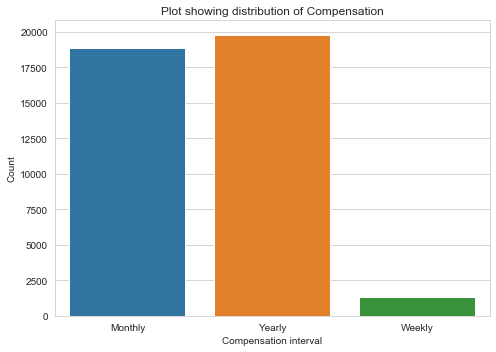

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(df['CompFreq'])
plt.title('Plot showing distribution of Compensation')
plt.xlabel('Compensation interval')
plt.ylabel('Count')
plt.tight_layout()

In [18]:
df.groupby('CompTotal')['CurrencySymbol'].value_counts() # What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? please estimate an equivalent weekly, monthly, or yearly salary. 

CompTotal      CurrencySymbol
0.000000e+00   USD               38
               INR               13
               EUR               10
               GBP                7
               CAD                4
                                 ..
1.000000e+36   INR                1
1.000000e+49   CAD                1
1.000000e+56   USD                1
1.000000e+150  USD                1
1.111111e+247  BYN                1
Name: CurrencySymbol, Length: 8070, dtype: int64

In [19]:
df['JobSeek'].value_counts()    # which of the following describes your job seeking status

I’m not actively looking, but I am open to new opportunities    29776
I am not interested in new job opportunities                    13001
I am actively looking for a job                                  8950
Name: JobSeek, dtype: int64

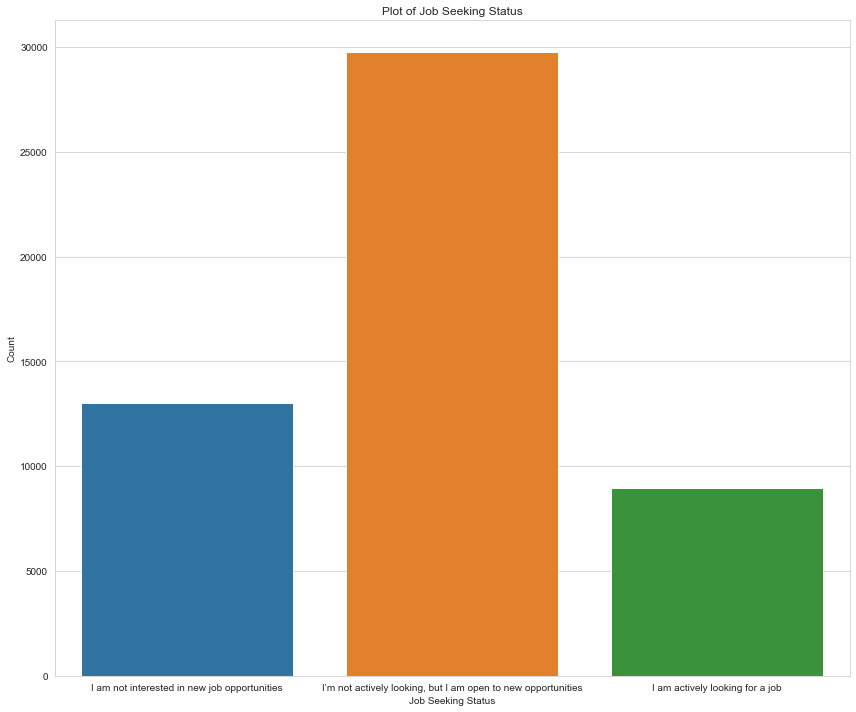

In [20]:
plt.figure(figsize=(12,10))
sns.countplot(df['JobSeek'])
plt.title('Plot of Job Seeking Status')
plt.xlabel('Job Seeking Status')
plt.ylabel('Count')
plt.tight_layout()

 ###  Which programming language have delopers done extensive development work on in the last one year.

In [21]:
df['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                                                          1073
HTML/CSS;JavaScript                                                                                                   900
C#;HTML/CSS;JavaScript;SQL                                                                                            856
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                                                 754
HTML/CSS;JavaScript;TypeScript                                                                                        697
                                                                                                                     ... 
Assembly;Bash/Shell/PowerShell;C;C++;Haskell;HTML/CSS;Java;JavaScript;Objective-C;Perl;PHP;Python;R;SQL;Swift;VBA       1
Bash/Shell/PowerShell;Go;Java;Perl;SQL                                                                                  1
Assembly;C#;C++;HTML/CSS

In [22]:
df['LanguageWorkedWith'].head(5)

0      C#;HTML/CSS;JavaScript
1            JavaScript;Swift
2    Objective-C;Python;Swift
3                         NaN
4           HTML/CSS;Ruby;SQL
Name: LanguageWorkedWith, dtype: object

In [27]:
lang_list = df['LanguageWorkedWith'].str.split(';', expand=True)

In [28]:
lang_list.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,C#,HTML/CSS,JavaScript,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,JavaScript,Swift,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Objective-C,Python,Swift,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HTML/CSS,Ruby,SQL,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [23]:
python = df['LanguageWorkedWith'].str.contains('Python') #figuring out how many respondents included python in their languages used. 

In [24]:
python.value_counts(normalize=True)

False    0.559291
True     0.440709
Name: LanguageWorkedWith, dtype: float64

##### 42% of all developers use python

In [30]:
lang_list.stack()

0      0            C#
       1      HTML/CSS
       2    JavaScript
1      0    JavaScript
       1         Swift
               ...    
64460  0            C#
       1      HTML/CSS
       2          Java
       3    JavaScript
       4           SQL
Length: 288004, dtype: object

In [31]:
lang_list.stack().value_counts()

JavaScript               38822
HTML/CSS                 36181
SQL                      31413
Python                   25287
Java                     23074
Bash/Shell/PowerShell    18980
C#                       18041
PHP                      15007
TypeScript               14578
C++                      13707
C                        12487
Go                        5038
Kotlin                    4468
Ruby                      4046
Assembly                  3553
VBA                       3499
Swift                     3397
R                         3288
Rust                      2929
Objective-C               2340
Dart                      2280
Scala                     2052
Perl                      1796
Haskell                   1222
Julia                      519
dtype: int64

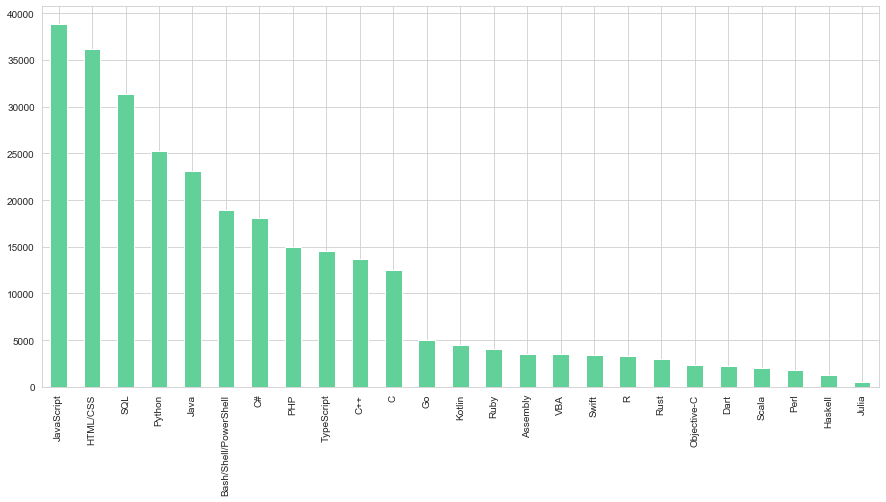

In [33]:
lang_list.stack().value_counts().plot(kind='bar', figsize=(15,7),color='#61d199')

In [35]:
df['SurveyEase'].value_counts()

Easy                          34626
Neither easy nor difficult    16476
Difficult                       700
Name: SurveyEase, dtype: int64

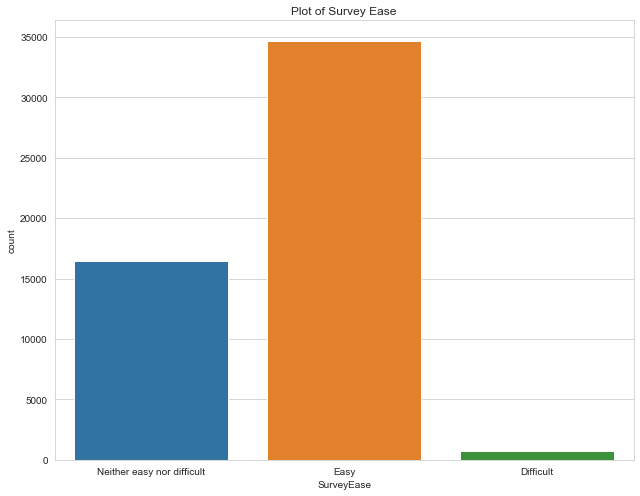

In [37]:
plt.figure(figsize=(9,7))
sns.countplot(df['SurveyEase'])
plt.title('Plot of Survey Ease')
plt.tight_layout()